In [17]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
import time
import random
import matplotlib.pyplot as plt

In [18]:
driver = webdriver.Chrome(ChromeDriverManager().install())

/var/folders/v8/qbhfywjj29x_mwp_gsm98j900000gn/T/ipykernel_19661/1503906442.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


In [19]:
block_min = 12965000
block_max = 15282336
blocks = 0
unc_blocks = 0

random.seed(42)
random_list = random.sample(range(block_min,block_max+1), 1000)

for block in random_list:    
    print(block)
    try:
        driver.get("https://etherscan.io/block/" + str(block))
        assert "Ethereum Blocks #"+str(block)+" | Etherscan" in driver.title 
    except:
        print('Last block: ', str(block-1))
        print('Unc blocks: ', str(unc_blocks))
        print('Total blocks: ', str(blocks))
        time.sleep(20)
        driver.get("https://etherscan.io/block/" + str(block))
        assert "Ethereum Blocks #"+str(block)+" | Etherscan" in driver.title 
        #exit()
    try:
        order = driver.find_element("xpath", "//a[@class='mb-1 mb-sm-0 u-label u-label--xs u-label--indigo']")
        if order.text == 'Unconventional Ordering':
            unc_blocks = unc_blocks+1
    except: 
        continue
    blocks = blocks + 1

print('Last block: ', str(block-1))
print('Unc blocks: ', str(unc_blocks))
print('Total blocks: ', str(blocks))

13431956
13069902
14118556
13992150
13901213
13550264
13394895
15252433
13329647
14734668
13098306
13089978
13357986
13882034
13940850
15084613
13076299
13798985
15250650
14724593
13889594
14849119
14131816
12992257
13634659
14737573
14392114
14130476
13617128
13868091
14376779
13393700
13354004
14558530
13370657
14470668
14407654
14074480
13147244
14891967
15214103
13488558
14552688
13295511
15280426
14194678
14481807
13771516
13256735
13157201
13920874
14178781
13299671
13941395
13388630
14559364
14130905
14866740
14495217
13647220
14517651
14455113
13843736
14084786
13264483
13682807
15205345
13991811
13650359
14903859
14556551
14097243
13886132
14325140
13199620
13925697
13099638
14288105
14647607
14087986
13242615
13849926
14284854
13856820
15058927
14624400
14889564
13564246
14075987
13550652
13999430
15225634
14067018
14761981
14640207
Last block:  14640206
Unc blocks:  50
Total blocks:  50
14483323
13884897
13545205
15102108
15034955
13346301
13162620
13424901
13606062
13636013

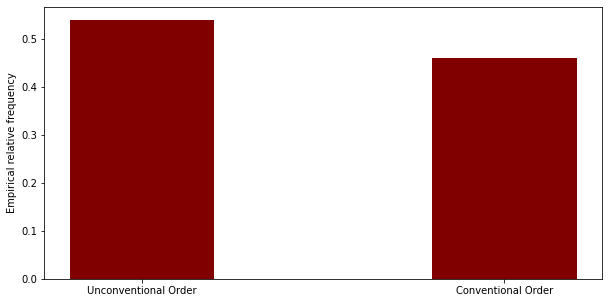

In [21]:
data = {
    'Unconventional Order': unc_blocks/len(random_list),
    'Conventional Order': (len(random_list)-unc_blocks)/(len(random_list))
}

courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))

plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.ylabel("Empirical relative frequency")
plt.show()

In [22]:
data

{'Unconventional Order': 0.54, 'Conventional Order': 0.46}